# 1. Import and Install Dependencies -:

In [1]:
!pip install tensorflow opencv-python mediapipe

In [5]:
!pip install --upgrade mediapipe


In [6]:
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import time 
import mediapipe as mp

# 2. Keypoints Using MP Holistic -:

In [7]:
# mediapipe holistic setup -:
mp_holistic =mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [8]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #Color Conversion
    image.flags.writeable=False  #Image no longer writeble
    results=model.process(image)  #Make Prediction
    image.flags.writeable = True #Image is now writeble
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #Color Conversion
    return image,results
    
    

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)       # Draw pose connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw Left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [10]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))       # Draw face connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))       # Draw pose connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=4))  # Draw Left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=1,circle_radius=2)) # Draw right hand connections



In [12]:
#We make sure that we can access the webcam -:
cap= cv2.VideoCapture(0)  #accessing webcam
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():    #looping through frames  
    #Read feed
        ret,frame = cap.read()
    
        #make  detection
        image,results = mediapipe_detection(frame,holistic)
        
        #Draw Landmarks
        draw_styled_landmarks(image,results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [13]:
draw_styled_landmarks(frame,results)

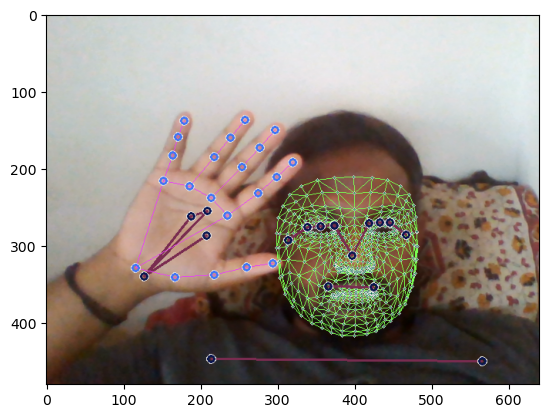

In [14]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoints Values -:

In [15]:
results.right_hand_landmarks.landmark

[x: 0.18245400488376617
y: 0.6865871548652649
z: 5.784940526609716e-07
, x: 0.2616634964942932
y: 0.7114971280097961
z: -0.03324297443032265
, x: 0.34206339716911316
y: 0.7045361995697021
z: -0.04818787798285484
, x: 0.4062936007976532
y: 0.6853410005569458
z: -0.06126386672258377
, x: 0.4595533311367035
y: 0.6731147766113281
z: -0.07367216050624847
, x: 0.3677005469799042
y: 0.5458207726478577
z: -0.02046903781592846
, x: 0.4311460256576538
y: 0.48376232385635376
z: -0.04090964421629906
, x: 0.46858301758766174
y: 0.44139280915260315
z: -0.05990622192621231
, x: 0.5000526905059814
y: 0.401328980922699
z: -0.07383529841899872
, x: 0.33524906635284424
y: 0.4959293603897095
z: -0.02131219021975994
, x: 0.397076278924942
y: 0.4144154489040375
z: -0.03659956157207489
, x: 0.43411844968795776
y: 0.36094316840171814
z: -0.05343502014875412
, x: 0.46508294343948364
y: 0.31261464953422546
z: -0.06640375405550003
, x: 0.29204797744750977
y: 0.4662061929702759
z: -0.026913877576589584
, x: 0.342

In [16]:
pose=[]
for res in results.pose_landmarks.landmark:
    test= np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [17]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [18]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [19]:
result_test=extract_keypoints(results)

In [20]:
np.save('0',result_test)

In [21]:
np.load('0.npy')

array([ 0.62170994,  0.65311641, -1.7639538 , ...,  0.28006196,
        0.2878494 , -0.06480467])

# 4. Setup Folders for Collection -:

In [50]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Create the data directory if it doesn't exist
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30



In [51]:
for action in actions: 
     for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoints Values for Training an Testing -:

In [52]:
#We make sure that we can access the webcam -:
cap= cv2.VideoCapture(0)  #accessing webcam
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    #looping through actions  
    for action in actions:
        
        #Loop through sequence:
        for sequence in range(no_sequences):
            
            #Loop through video length aka sequence length
            for frame_num in range(sequence_length):
              
                
                #Read feed
                ret,frame = cap.read()

                #make  detection
                image,results = mediapipe_detection(frame,holistic)

                #Draw Landmarks
                draw_styled_landmarks(image,results)
                
                #Apply collection  wait logic
                if frame_num ==0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)
                    cv2.waitKey(2000)
                    
                    #show to screen 
                    cv2.imshow('OpenCV Feed',image)
                    cv2.waitKey(2000)
                
                else:
                    cv2.putText(image,'Collecting frames for {} Video number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)
                    #Show to screen
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)
                #Export keypoints
                
                keypoints= extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
                
                
                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [101]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features -:

In [53]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [54]:
label_map = {label:num for num,label in enumerate(actions)}

In [55]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [60]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [61]:
np.array(sequences).shape

(90, 30, 1662)

In [62]:
np.array(labels).shape

(90,)

In [63]:
#sequences stored in X
X = np.array(sequences)

In [64]:
X.shape

(90, 30, 1662)

In [65]:
#Converting labels andstoredin Y
Y =  to_categorical(labels).astype(int)

In [66]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [67]:
#Splitting data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5)

# 7. Build and Train LSTM Neural Network -:

In [68]:
#Importing Required Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Dense
from tensorflow.keras.callbacks import TensorBoard

In [69]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [70]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [71]:
res= [0.7,0.2,0.1]

In [72]:
actions[np.argmax(res)]

'hello'

In [73]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [74]:
model.fit(X_train,Y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 23s 297ms/step - loss: 2.3097 - categorical_accuracy: 0.1778
Epoch 2/2000
2/2 [==============================] - 0s 204ms/step - loss: 1.2954 - categorical_accuracy: 0.4444
Epoch 3/2000
2/2 [==============================] - 0s 189ms/step - loss: 2.4286 - categorical_accuracy: 0.3111
Epoch 4/2000
2/2 [==============================] - 0s 177ms/step - loss: 3.3804 - categorical_accuracy: 0.3111
Epoch 5/2000
2/2 [==============================] - 0s 169ms/step - loss: 1.6500 - categorical_accuracy: 0.2889
Epoch 6/2000
2/2 [==============================] - 0s 183ms/step - loss: 2.8342 - categorical_accuracy: 0.2889
Epoch 7/2000
2/2 [==============================] - 0s 171ms/step - loss: 4.2058 - categorical_accuracy: 0.5111
Epoch 8/2000
2/2 [==============================] - 0s 175ms/step - loss: 2.7937 - categorical_accuracy: 0.3111
Epoch 9/2000
2/2 [==============================] - 0s 171ms/step - loss: 2.0079 - categorical_accuracy

2/2 [==============================] - 0s 165ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 74/2000
2/2 [==============================] - 0s 160ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 75/2000
2/2 [==============================] - 0s 163ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 76/2000
2/2 [==============================] - 0s 163ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 77/2000
2/2 [==============================] - 0s 160ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 78/2000
2/2 [==============================] - 0s 160ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 79/2000
2/2 [==============================] - 0s 179ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 80/2000
2/2 [==============================] - 0s 162ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 81/2000
2/2 [==============================] - 0s 164ms/step - loss: 0.0022 - categorical_accuracy: 1.00

Epoch 144/2000
2/2 [==============================] - 0s 162ms/step - loss: 4.6480e-04 - categorical_accuracy: 1.0000
Epoch 145/2000
2/2 [==============================] - 0s 161ms/step - loss: 4.5509e-04 - categorical_accuracy: 1.0000
Epoch 146/2000
2/2 [==============================] - 0s 161ms/step - loss: 4.4555e-04 - categorical_accuracy: 1.0000
Epoch 147/2000
2/2 [==============================] - 0s 169ms/step - loss: 4.3538e-04 - categorical_accuracy: 1.0000
Epoch 148/2000
2/2 [==============================] - 0s 160ms/step - loss: 4.2425e-04 - categorical_accuracy: 1.0000
Epoch 149/2000
2/2 [==============================] - 0s 160ms/step - loss: 4.1167e-04 - categorical_accuracy: 1.0000
Epoch 150/2000
2/2 [==============================] - 0s 160ms/step - loss: 4.0402e-04 - categorical_accuracy: 1.0000
Epoch 151/2000
2/2 [==============================] - 0s 164ms/step - loss: 3.9148e-04 - categorical_accuracy: 1.0000
Epoch 152/2000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 166ms/step - loss: 2.2126e-04 - categorical_accuracy: 1.0000
Epoch 214/2000
2/2 [==============================] - 0s 167ms/step - loss: 2.1862e-04 - categorical_accuracy: 1.0000
Epoch 215/2000
2/2 [==============================] - 0s 164ms/step - loss: 2.1580e-04 - categorical_accuracy: 1.0000
Epoch 216/2000
2/2 [==============================] - 0s 163ms/step - loss: 2.1310e-04 - categorical_accuracy: 1.0000
Epoch 217/2000
2/2 [==============================] - 0s 164ms/step - loss: 2.1073e-04 - categorical_accuracy: 1.0000
Epoch 218/2000
2/2 [==============================] - 0s 173ms/step - loss: 2.0773e-04 - categorical_accuracy: 1.0000
Epoch 219/2000
2/2 [==============================] - 0s 163ms/step - loss: 2.0539e-04 - categorical_accuracy: 1.0000
Epoch 220/2000
2/2 [==============================] - 0s 163ms/step - loss: 2.0356e-04 - categorical_accuracy: 1.0000
Epoch 221/2000
2/2 [==============================] - 0s 177ms/step - l

2/2 [==============================] - 0s 161ms/step - loss: 1.0986e-04 - categorical_accuracy: 1.0000
Epoch 283/2000
2/2 [==============================] - 0s 188ms/step - loss: 1.0897e-04 - categorical_accuracy: 1.0000
Epoch 284/2000
2/2 [==============================] - 0s 166ms/step - loss: 1.0806e-04 - categorical_accuracy: 1.0000
Epoch 285/2000
2/2 [==============================] - 0s 163ms/step - loss: 1.0717e-04 - categorical_accuracy: 1.0000
Epoch 286/2000
2/2 [==============================] - 0s 166ms/step - loss: 1.0630e-04 - categorical_accuracy: 1.0000
Epoch 287/2000
2/2 [==============================] - 0s 162ms/step - loss: 1.0550e-04 - categorical_accuracy: 1.0000
Epoch 288/2000
2/2 [==============================] - 0s 170ms/step - loss: 1.0473e-04 - categorical_accuracy: 1.0000
Epoch 289/2000
2/2 [==============================] - 0s 160ms/step - loss: 1.0369e-04 - categorical_accuracy: 1.0000
Epoch 290/2000
2/2 [==============================] - 0s 165ms/step - l

2/2 [==============================] - 0s 162ms/step - loss: 6.3789e-05 - categorical_accuracy: 1.0000
Epoch 352/2000
2/2 [==============================] - 0s 168ms/step - loss: 6.3339e-05 - categorical_accuracy: 1.0000
Epoch 353/2000
2/2 [==============================] - 0s 167ms/step - loss: 6.2880e-05 - categorical_accuracy: 1.0000
Epoch 354/2000
2/2 [==============================] - 0s 163ms/step - loss: 6.2427e-05 - categorical_accuracy: 1.0000
Epoch 355/2000
2/2 [==============================] - 0s 168ms/step - loss: 6.1908e-05 - categorical_accuracy: 1.0000
Epoch 356/2000
2/2 [==============================] - 0s 162ms/step - loss: 6.1471e-05 - categorical_accuracy: 1.0000
Epoch 357/2000
2/2 [==============================] - 0s 175ms/step - loss: 6.1008e-05 - categorical_accuracy: 1.0000
Epoch 358/2000
2/2 [==============================] - 0s 218ms/step - loss: 6.0621e-05 - categorical_accuracy: 1.0000
Epoch 359/2000
2/2 [==============================] - 0s 195ms/step - l

2/2 [==============================] - 1s 253ms/step - loss: 4.0083e-05 - categorical_accuracy: 1.0000
Epoch 421/2000
2/2 [==============================] - 1s 232ms/step - loss: 3.9728e-05 - categorical_accuracy: 1.0000
Epoch 422/2000
2/2 [==============================] - 1s 243ms/step - loss: 3.9416e-05 - categorical_accuracy: 1.0000
Epoch 423/2000
2/2 [==============================] - 1s 231ms/step - loss: 3.9058e-05 - categorical_accuracy: 1.0000
Epoch 424/2000
2/2 [==============================] - 1s 232ms/step - loss: 3.8709e-05 - categorical_accuracy: 1.0000
Epoch 425/2000
2/2 [==============================] - 1s 228ms/step - loss: 3.8391e-05 - categorical_accuracy: 1.0000
Epoch 426/2000
2/2 [==============================] - 0s 230ms/step - loss: 3.8062e-05 - categorical_accuracy: 1.0000
Epoch 427/2000
2/2 [==============================] - 1s 242ms/step - loss: 3.7755e-05 - categorical_accuracy: 1.0000
Epoch 428/2000
2/2 [==============================] - 1s 242ms/step - l

2/2 [==============================] - 1s 242ms/step - loss: 2.3518e-05 - categorical_accuracy: 1.0000
Epoch 490/2000
2/2 [==============================] - 1s 221ms/step - loss: 2.3335e-05 - categorical_accuracy: 1.0000
Epoch 491/2000
2/2 [==============================] - 1s 265ms/step - loss: 2.3136e-05 - categorical_accuracy: 1.0000
Epoch 492/2000
2/2 [==============================] - 1s 265ms/step - loss: 2.2948e-05 - categorical_accuracy: 1.0000
Epoch 493/2000
2/2 [==============================] - 1s 241ms/step - loss: 2.2771e-05 - categorical_accuracy: 1.0000
Epoch 494/2000
2/2 [==============================] - 1s 233ms/step - loss: 2.2585e-05 - categorical_accuracy: 1.0000
Epoch 495/2000
2/2 [==============================] - 0s 229ms/step - loss: 2.2403e-05 - categorical_accuracy: 1.0000
Epoch 496/2000
2/2 [==============================] - 1s 230ms/step - loss: 2.2233e-05 - categorical_accuracy: 1.0000
Epoch 497/2000
2/2 [==============================] - 0s 216ms/step - l

2/2 [==============================] - 0s 161ms/step - loss: 1.3009e-05 - categorical_accuracy: 1.0000
Epoch 559/2000
2/2 [==============================] - 0s 161ms/step - loss: 1.2911e-05 - categorical_accuracy: 1.0000
Epoch 560/2000
2/2 [==============================] - 0s 168ms/step - loss: 1.2798e-05 - categorical_accuracy: 1.0000
Epoch 561/2000
2/2 [==============================] - 0s 179ms/step - loss: 1.2692e-05 - categorical_accuracy: 1.0000
Epoch 562/2000
2/2 [==============================] - 0s 163ms/step - loss: 1.2602e-05 - categorical_accuracy: 1.0000
Epoch 563/2000
2/2 [==============================] - 0s 170ms/step - loss: 1.2501e-05 - categorical_accuracy: 1.0000
Epoch 564/2000
2/2 [==============================] - 0s 174ms/step - loss: 1.2376e-05 - categorical_accuracy: 1.0000
Epoch 565/2000
2/2 [==============================] - 0s 160ms/step - loss: 1.2289e-05 - categorical_accuracy: 1.0000
Epoch 566/2000
2/2 [==============================] - 0s 162ms/step - l

2/2 [==============================] - 0s 177ms/step - loss: 8.1008e-06 - categorical_accuracy: 1.0000
Epoch 628/2000
2/2 [==============================] - 0s 186ms/step - loss: 8.0611e-06 - categorical_accuracy: 1.0000
Epoch 629/2000
2/2 [==============================] - 0s 177ms/step - loss: 8.0134e-06 - categorical_accuracy: 1.0000
Epoch 630/2000
2/2 [==============================] - 0s 171ms/step - loss: 7.9710e-06 - categorical_accuracy: 1.0000
Epoch 631/2000
2/2 [==============================] - 0s 172ms/step - loss: 7.9233e-06 - categorical_accuracy: 1.0000
Epoch 632/2000
2/2 [==============================] - 0s 172ms/step - loss: 7.8836e-06 - categorical_accuracy: 1.0000
Epoch 633/2000
2/2 [==============================] - 0s 165ms/step - loss: 7.8465e-06 - categorical_accuracy: 1.0000
Epoch 634/2000
2/2 [==============================] - 0s 171ms/step - loss: 7.8068e-06 - categorical_accuracy: 1.0000
Epoch 635/2000
2/2 [==============================] - 0s 167ms/step - l

2/2 [==============================] - 0s 163ms/step - loss: 5.7167e-06 - categorical_accuracy: 1.0000
Epoch 697/2000
2/2 [==============================] - 0s 168ms/step - loss: 5.6823e-06 - categorical_accuracy: 1.0000
Epoch 698/2000
2/2 [==============================] - 0s 170ms/step - loss: 5.6611e-06 - categorical_accuracy: 1.0000
Epoch 699/2000
2/2 [==============================] - 0s 165ms/step - loss: 5.6346e-06 - categorical_accuracy: 1.0000
Epoch 700/2000
2/2 [==============================] - 0s 176ms/step - loss: 5.6240e-06 - categorical_accuracy: 1.0000
Epoch 701/2000
2/2 [==============================] - 0s 160ms/step - loss: 5.5948e-06 - categorical_accuracy: 1.0000
Epoch 702/2000
2/2 [==============================] - 0s 167ms/step - loss: 5.5578e-06 - categorical_accuracy: 1.0000
Epoch 703/2000
2/2 [==============================] - 0s 170ms/step - loss: 5.5366e-06 - categorical_accuracy: 1.0000
Epoch 704/2000
2/2 [==============================] - 0s 163ms/step - l

2/2 [==============================] - 0s 164ms/step - loss: 4.3206e-06 - categorical_accuracy: 1.0000
Epoch 766/2000
2/2 [==============================] - 0s 160ms/step - loss: 4.2942e-06 - categorical_accuracy: 1.0000
Epoch 767/2000
2/2 [==============================] - 0s 154ms/step - loss: 4.2730e-06 - categorical_accuracy: 1.0000
Epoch 768/2000
2/2 [==============================] - 0s 170ms/step - loss: 4.2624e-06 - categorical_accuracy: 1.0000
Epoch 769/2000
2/2 [==============================] - 0s 176ms/step - loss: 4.2385e-06 - categorical_accuracy: 1.0000
Epoch 770/2000
2/2 [==============================] - 0s 163ms/step - loss: 4.2226e-06 - categorical_accuracy: 1.0000
Epoch 771/2000
2/2 [==============================] - 0s 171ms/step - loss: 4.2014e-06 - categorical_accuracy: 1.0000
Epoch 772/2000
2/2 [==============================] - 0s 169ms/step - loss: 4.1908e-06 - categorical_accuracy: 1.0000
Epoch 773/2000
2/2 [==============================] - 0s 169ms/step - l

2/2 [==============================] - 0s 175ms/step - loss: 3.2478e-06 - categorical_accuracy: 1.0000
Epoch 835/2000
2/2 [==============================] - 0s 183ms/step - loss: 3.2425e-06 - categorical_accuracy: 1.0000
Epoch 836/2000
2/2 [==============================] - 0s 178ms/step - loss: 3.2292e-06 - categorical_accuracy: 1.0000
Epoch 837/2000
2/2 [==============================] - 0s 173ms/step - loss: 3.2133e-06 - categorical_accuracy: 1.0000
Epoch 838/2000
2/2 [==============================] - 0s 166ms/step - loss: 3.2054e-06 - categorical_accuracy: 1.0000
Epoch 839/2000
2/2 [==============================] - 0s 179ms/step - loss: 3.1948e-06 - categorical_accuracy: 1.0000
Epoch 840/2000
2/2 [==============================] - 0s 174ms/step - loss: 3.1789e-06 - categorical_accuracy: 1.0000
Epoch 841/2000
2/2 [==============================] - 0s 175ms/step - loss: 3.1710e-06 - categorical_accuracy: 1.0000
Epoch 842/2000
2/2 [==============================] - 0s 172ms/step - l

2/2 [==============================] - 0s 173ms/step - loss: 2.5776e-06 - categorical_accuracy: 1.0000
Epoch 904/2000
2/2 [==============================] - 0s 165ms/step - loss: 2.5723e-06 - categorical_accuracy: 1.0000
Epoch 905/2000
2/2 [==============================] - 0s 170ms/step - loss: 2.5670e-06 - categorical_accuracy: 1.0000
Epoch 906/2000
2/2 [==============================] - 0s 182ms/step - loss: 2.5564e-06 - categorical_accuracy: 1.0000
Epoch 907/2000
2/2 [==============================] - 0s 164ms/step - loss: 2.5484e-06 - categorical_accuracy: 1.0000
Epoch 908/2000
2/2 [==============================] - 0s 168ms/step - loss: 2.5378e-06 - categorical_accuracy: 1.0000
Epoch 909/2000
2/2 [==============================] - 0s 167ms/step - loss: 2.5299e-06 - categorical_accuracy: 1.0000
Epoch 910/2000
2/2 [==============================] - 0s 161ms/step - loss: 2.5219e-06 - categorical_accuracy: 1.0000
Epoch 911/2000
2/2 [==============================] - 0s 176ms/step - l

2/2 [==============================] - 0s 167ms/step - loss: 2.1007e-06 - categorical_accuracy: 1.0000
Epoch 973/2000
2/2 [==============================] - 0s 167ms/step - loss: 2.0981e-06 - categorical_accuracy: 1.0000
Epoch 974/2000
2/2 [==============================] - 0s 172ms/step - loss: 2.0875e-06 - categorical_accuracy: 1.0000
Epoch 975/2000
2/2 [==============================] - 0s 161ms/step - loss: 2.0822e-06 - categorical_accuracy: 1.0000
Epoch 976/2000
2/2 [==============================] - 0s 168ms/step - loss: 2.0769e-06 - categorical_accuracy: 1.0000
Epoch 977/2000
2/2 [==============================] - 0s 164ms/step - loss: 2.0663e-06 - categorical_accuracy: 1.0000
Epoch 978/2000
2/2 [==============================] - 0s 165ms/step - loss: 2.0636e-06 - categorical_accuracy: 1.0000
Epoch 979/2000
2/2 [==============================] - 0s 166ms/step - loss: 2.0557e-06 - categorical_accuracy: 1.0000
Epoch 980/2000
2/2 [==============================] - 0s 169ms/step - l

2/2 [==============================] - 0s 183ms/step - loss: 1.7378e-06 - categorical_accuracy: 1.0000
Epoch 1042/2000
2/2 [==============================] - 1s 227ms/step - loss: 1.7272e-06 - categorical_accuracy: 1.0000
Epoch 1043/2000
2/2 [==============================] - 0s 164ms/step - loss: 1.7246e-06 - categorical_accuracy: 1.0000
Epoch 1044/2000
2/2 [==============================] - 0s 225ms/step - loss: 1.7140e-06 - categorical_accuracy: 1.0000
Epoch 1045/2000
2/2 [==============================] - 0s 234ms/step - loss: 1.7113e-06 - categorical_accuracy: 1.0000
Epoch 1046/2000
2/2 [==============================] - 1s 230ms/step - loss: 1.7087e-06 - categorical_accuracy: 1.0000
Epoch 1047/2000
2/2 [==============================] - 0s 170ms/step - loss: 1.7087e-06 - categorical_accuracy: 1.0000
Epoch 1048/2000
2/2 [==============================] - 0s 226ms/step - loss: 1.7087e-06 - categorical_accuracy: 1.0000
Epoch 1049/2000
2/2 [==============================] - 0s 169ms/

Epoch 1110/2000
2/2 [==============================] - 0s 169ms/step - loss: 1.4596e-06 - categorical_accuracy: 1.0000
Epoch 1111/2000
2/2 [==============================] - 0s 167ms/step - loss: 1.4570e-06 - categorical_accuracy: 1.0000
Epoch 1112/2000
2/2 [==============================] - 0s 179ms/step - loss: 1.4491e-06 - categorical_accuracy: 1.0000
Epoch 1113/2000
2/2 [==============================] - 0s 216ms/step - loss: 1.4464e-06 - categorical_accuracy: 1.0000
Epoch 1114/2000
2/2 [==============================] - 0s 206ms/step - loss: 1.4491e-06 - categorical_accuracy: 1.0000
Epoch 1115/2000
2/2 [==============================] - 0s 213ms/step - loss: 1.4411e-06 - categorical_accuracy: 1.0000
Epoch 1116/2000
2/2 [==============================] - 0s 182ms/step - loss: 1.4411e-06 - categorical_accuracy: 1.0000
Epoch 1117/2000
2/2 [==============================] - 0s 173ms/step - loss: 1.4358e-06 - categorical_accuracy: 1.0000
Epoch 1118/2000
2/2 [===========================

2/2 [==============================] - 0s 167ms/step - loss: 1.2345e-06 - categorical_accuracy: 1.0000
Epoch 1179/2000
2/2 [==============================] - 0s 167ms/step - loss: 1.2345e-06 - categorical_accuracy: 1.0000
Epoch 1180/2000
2/2 [==============================] - 0s 165ms/step - loss: 1.2318e-06 - categorical_accuracy: 1.0000
Epoch 1181/2000
2/2 [==============================] - 0s 159ms/step - loss: 1.2345e-06 - categorical_accuracy: 1.0000
Epoch 1182/2000
2/2 [==============================] - 0s 170ms/step - loss: 1.2265e-06 - categorical_accuracy: 1.0000
Epoch 1183/2000
2/2 [==============================] - 0s 162ms/step - loss: 1.2265e-06 - categorical_accuracy: 1.0000
Epoch 1184/2000
2/2 [==============================] - 0s 163ms/step - loss: 1.2239e-06 - categorical_accuracy: 1.0000
Epoch 1185/2000
2/2 [==============================] - 0s 169ms/step - loss: 1.2239e-06 - categorical_accuracy: 1.0000
Epoch 1186/2000
2/2 [==============================] - 0s 172ms/

Epoch 1247/2000
2/2 [==============================] - 0s 164ms/step - loss: 1.0570e-06 - categorical_accuracy: 1.0000
Epoch 1248/2000
2/2 [==============================] - 0s 164ms/step - loss: 1.0570e-06 - categorical_accuracy: 1.0000
Epoch 1249/2000
2/2 [==============================] - 0s 166ms/step - loss: 1.0570e-06 - categorical_accuracy: 1.0000
Epoch 1250/2000
2/2 [==============================] - 0s 166ms/step - loss: 1.0517e-06 - categorical_accuracy: 1.0000
Epoch 1251/2000
2/2 [==============================] - 0s 162ms/step - loss: 1.0490e-06 - categorical_accuracy: 1.0000
Epoch 1252/2000
2/2 [==============================] - 0s 163ms/step - loss: 1.0464e-06 - categorical_accuracy: 1.0000
Epoch 1253/2000
2/2 [==============================] - 0s 177ms/step - loss: 1.0464e-06 - categorical_accuracy: 1.0000
Epoch 1254/2000
2/2 [==============================] - 0s 161ms/step - loss: 1.0411e-06 - categorical_accuracy: 1.0000
Epoch 1255/2000
2/2 [===========================

2/2 [==============================] - 0s 172ms/step - loss: 9.1129e-07 - categorical_accuracy: 1.0000
Epoch 1316/2000
2/2 [==============================] - 0s 167ms/step - loss: 9.1129e-07 - categorical_accuracy: 1.0000
Epoch 1317/2000
2/2 [==============================] - 0s 166ms/step - loss: 9.1129e-07 - categorical_accuracy: 1.0000
Epoch 1318/2000
2/2 [==============================] - 0s 167ms/step - loss: 9.0864e-07 - categorical_accuracy: 1.0000
Epoch 1319/2000
2/2 [==============================] - 0s 161ms/step - loss: 9.0864e-07 - categorical_accuracy: 1.0000
Epoch 1320/2000
2/2 [==============================] - 0s 164ms/step - loss: 9.0864e-07 - categorical_accuracy: 1.0000
Epoch 1321/2000
2/2 [==============================] - 0s 168ms/step - loss: 9.0864e-07 - categorical_accuracy: 1.0000
Epoch 1322/2000
2/2 [==============================] - 0s 167ms/step - loss: 9.0864e-07 - categorical_accuracy: 1.0000
Epoch 1323/2000
2/2 [==============================] - 0s 169ms/

Epoch 1384/2000
2/2 [==============================] - 0s 198ms/step - loss: 7.9473e-07 - categorical_accuracy: 1.0000
Epoch 1385/2000
2/2 [==============================] - 0s 175ms/step - loss: 7.9208e-07 - categorical_accuracy: 1.0000
Epoch 1386/2000
2/2 [==============================] - 0s 253ms/step - loss: 7.9208e-07 - categorical_accuracy: 1.0000
Epoch 1387/2000
2/2 [==============================] - 0s 171ms/step - loss: 7.9208e-07 - categorical_accuracy: 1.0000
Epoch 1388/2000
2/2 [==============================] - 0s 184ms/step - loss: 7.8943e-07 - categorical_accuracy: 1.0000
Epoch 1389/2000
2/2 [==============================] - 0s 168ms/step - loss: 7.8413e-07 - categorical_accuracy: 1.0000
Epoch 1390/2000
2/2 [==============================] - 0s 190ms/step - loss: 7.8148e-07 - categorical_accuracy: 1.0000
Epoch 1391/2000
2/2 [==============================] - 0s 188ms/step - loss: 7.8148e-07 - categorical_accuracy: 1.0000
Epoch 1392/2000
2/2 [===========================

2/2 [==============================] - 0s 166ms/step - loss: 6.8876e-07 - categorical_accuracy: 1.0000
Epoch 1453/2000
2/2 [==============================] - 0s 194ms/step - loss: 6.8876e-07 - categorical_accuracy: 1.0000
Epoch 1454/2000
2/2 [==============================] - 1s 226ms/step - loss: 6.8611e-07 - categorical_accuracy: 1.0000
Epoch 1455/2000
2/2 [==============================] - 0s 181ms/step - loss: 6.8612e-07 - categorical_accuracy: 1.0000
Epoch 1456/2000
2/2 [==============================] - 0s 173ms/step - loss: 6.8347e-07 - categorical_accuracy: 1.0000
Epoch 1457/2000
2/2 [==============================] - 0s 171ms/step - loss: 6.8082e-07 - categorical_accuracy: 1.0000
Epoch 1458/2000
2/2 [==============================] - 0s 175ms/step - loss: 6.8082e-07 - categorical_accuracy: 1.0000
Epoch 1459/2000
2/2 [==============================] - 0s 169ms/step - loss: 6.7817e-07 - categorical_accuracy: 1.0000
Epoch 1460/2000
2/2 [==============================] - 0s 160ms/

Epoch 1521/2000
2/2 [==============================] - 0s 164ms/step - loss: 6.0664e-07 - categorical_accuracy: 1.0000
Epoch 1522/2000
2/2 [==============================] - 0s 170ms/step - loss: 6.0664e-07 - categorical_accuracy: 1.0000
Epoch 1523/2000
2/2 [==============================] - 0s 163ms/step - loss: 6.0134e-07 - categorical_accuracy: 1.0000
Epoch 1524/2000
2/2 [==============================] - 0s 173ms/step - loss: 6.0134e-07 - categorical_accuracy: 1.0000
Epoch 1525/2000
2/2 [==============================] - 0s 162ms/step - loss: 6.0134e-07 - categorical_accuracy: 1.0000
Epoch 1526/2000
2/2 [==============================] - 0s 174ms/step - loss: 6.0134e-07 - categorical_accuracy: 1.0000
Epoch 1527/2000
2/2 [==============================] - 0s 166ms/step - loss: 5.9869e-07 - categorical_accuracy: 1.0000
Epoch 1528/2000
2/2 [==============================] - 0s 175ms/step - loss: 5.9869e-07 - categorical_accuracy: 1.0000
Epoch 1529/2000
2/2 [===========================

2/2 [==============================] - 0s 168ms/step - loss: 5.4041e-07 - categorical_accuracy: 1.0000
Epoch 1590/2000
2/2 [==============================] - 0s 175ms/step - loss: 5.4041e-07 - categorical_accuracy: 1.0000
Epoch 1591/2000
2/2 [==============================] - 0s 164ms/step - loss: 5.3777e-07 - categorical_accuracy: 1.0000
Epoch 1592/2000
2/2 [==============================] - 0s 168ms/step - loss: 5.3512e-07 - categorical_accuracy: 1.0000
Epoch 1593/2000
2/2 [==============================] - 0s 172ms/step - loss: 5.3512e-07 - categorical_accuracy: 1.0000
Epoch 1594/2000
2/2 [==============================] - 0s 158ms/step - loss: 5.3512e-07 - categorical_accuracy: 1.0000
Epoch 1595/2000
2/2 [==============================] - 0s 163ms/step - loss: 5.3512e-07 - categorical_accuracy: 1.0000
Epoch 1596/2000
2/2 [==============================] - 0s 164ms/step - loss: 5.3512e-07 - categorical_accuracy: 1.0000
Epoch 1597/2000
2/2 [==============================] - 0s 164ms/

Epoch 1658/2000
2/2 [==============================] - 0s 171ms/step - loss: 4.7419e-07 - categorical_accuracy: 1.0000
Epoch 1659/2000
2/2 [==============================] - 0s 161ms/step - loss: 4.7419e-07 - categorical_accuracy: 1.0000
Epoch 1660/2000
2/2 [==============================] - 0s 175ms/step - loss: 4.7419e-07 - categorical_accuracy: 1.0000
Epoch 1661/2000
2/2 [==============================] - 0s 177ms/step - loss: 4.7419e-07 - categorical_accuracy: 1.0000
Epoch 1662/2000
2/2 [==============================] - 0s 210ms/step - loss: 4.7419e-07 - categorical_accuracy: 1.0000
Epoch 1663/2000
2/2 [==============================] - 0s 191ms/step - loss: 4.7154e-07 - categorical_accuracy: 1.0000
Epoch 1664/2000
2/2 [==============================] - 0s 169ms/step - loss: 4.6889e-07 - categorical_accuracy: 1.0000
Epoch 1665/2000
2/2 [==============================] - 0s 164ms/step - loss: 4.6889e-07 - categorical_accuracy: 1.0000
Epoch 1666/2000
2/2 [===========================

2/2 [==============================] - 0s 173ms/step - loss: 4.2121e-07 - categorical_accuracy: 1.0000
Epoch 1727/2000
2/2 [==============================] - 0s 179ms/step - loss: 4.2121e-07 - categorical_accuracy: 1.0000
Epoch 1728/2000
2/2 [==============================] - 0s 174ms/step - loss: 4.2121e-07 - categorical_accuracy: 1.0000
Epoch 1729/2000
2/2 [==============================] - 0s 163ms/step - loss: 4.2121e-07 - categorical_accuracy: 1.0000
Epoch 1730/2000
2/2 [==============================] - 0s 188ms/step - loss: 4.1856e-07 - categorical_accuracy: 1.0000
Epoch 1731/2000
2/2 [==============================] - 0s 166ms/step - loss: 4.1591e-07 - categorical_accuracy: 1.0000
Epoch 1732/2000
2/2 [==============================] - 0s 156ms/step - loss: 4.1591e-07 - categorical_accuracy: 1.0000
Epoch 1733/2000
2/2 [==============================] - 0s 171ms/step - loss: 4.1326e-07 - categorical_accuracy: 1.0000
Epoch 1734/2000
2/2 [==============================] - 0s 170ms/

Epoch 1795/2000
2/2 [==============================] - 0s 168ms/step - loss: 3.7882e-07 - categorical_accuracy: 1.0000
Epoch 1796/2000
2/2 [==============================] - 0s 164ms/step - loss: 3.7617e-07 - categorical_accuracy: 1.0000
Epoch 1797/2000
2/2 [==============================] - 0s 163ms/step - loss: 3.7617e-07 - categorical_accuracy: 1.0000
Epoch 1798/2000
2/2 [==============================] - 0s 207ms/step - loss: 3.7617e-07 - categorical_accuracy: 1.0000
Epoch 1799/2000
2/2 [==============================] - 0s 189ms/step - loss: 3.7087e-07 - categorical_accuracy: 1.0000
Epoch 1800/2000
2/2 [==============================] - 0s 233ms/step - loss: 3.7087e-07 - categorical_accuracy: 1.0000
Epoch 1801/2000
2/2 [==============================] - 0s 158ms/step - loss: 3.7087e-07 - categorical_accuracy: 1.0000
Epoch 1802/2000
2/2 [==============================] - 0s 164ms/step - loss: 3.7087e-07 - categorical_accuracy: 1.0000
Epoch 1803/2000
2/2 [===========================

2/2 [==============================] - 0s 209ms/step - loss: 3.4173e-07 - categorical_accuracy: 1.0000
Epoch 1864/2000
2/2 [==============================] - 0s 209ms/step - loss: 3.4173e-07 - categorical_accuracy: 1.0000
Epoch 1865/2000
2/2 [==============================] - 0s 181ms/step - loss: 3.4173e-07 - categorical_accuracy: 1.0000
Epoch 1866/2000
2/2 [==============================] - 0s 210ms/step - loss: 3.3643e-07 - categorical_accuracy: 1.0000
Epoch 1867/2000
2/2 [==============================] - 0s 208ms/step - loss: 3.3908e-07 - categorical_accuracy: 1.0000
Epoch 1868/2000
2/2 [==============================] - 0s 231ms/step - loss: 3.3908e-07 - categorical_accuracy: 1.0000
Epoch 1869/2000
2/2 [==============================] - 1s 258ms/step - loss: 3.3908e-07 - categorical_accuracy: 1.0000
Epoch 1870/2000
2/2 [==============================] - 0s 224ms/step - loss: 3.3643e-07 - categorical_accuracy: 1.0000
Epoch 1871/2000
2/2 [==============================] - 0s 202ms/

Epoch 1932/2000
2/2 [==============================] - 0s 164ms/step - loss: 3.0729e-07 - categorical_accuracy: 1.0000
Epoch 1933/2000
2/2 [==============================] - 0s 160ms/step - loss: 3.0729e-07 - categorical_accuracy: 1.0000
Epoch 1934/2000
2/2 [==============================] - 0s 163ms/step - loss: 3.0729e-07 - categorical_accuracy: 1.0000
Epoch 1935/2000
2/2 [==============================] - 0s 168ms/step - loss: 3.0729e-07 - categorical_accuracy: 1.0000
Epoch 1936/2000
2/2 [==============================] - 0s 168ms/step - loss: 3.0729e-07 - categorical_accuracy: 1.0000
Epoch 1937/2000
2/2 [==============================] - 0s 166ms/step - loss: 3.0465e-07 - categorical_accuracy: 1.0000
Epoch 1938/2000
2/2 [==============================] - 0s 166ms/step - loss: 3.0465e-07 - categorical_accuracy: 1.0000
Epoch 1939/2000
2/2 [==============================] - 0s 165ms/step - loss: 3.0465e-07 - categorical_accuracy: 1.0000
Epoch 1940/2000
2/2 [===========================

2/2 [==============================] - 0s 161ms/step - loss: 2.7021e-07 - categorical_accuracy: 1.0000


In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Prediction -:

In [76]:
res=model.predict(X_test)

2/2 [==============================] - 1s 36ms/step


In [90]:
actions[np.argmax(res[4])]

'hello'

In [91]:
actions[np.argmax(Y_test[4])]

'hello'

# 9. Save Weights -:

In [92]:
model.save('sign.h5')

# 10. Evaluation Using Confusion Matrix and Accuracy -:

In [93]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [94]:
yhat= model.predict(X_test)

2/2 [==============================] - 0s 69ms/step


In [95]:
ytrue=np.argmax(Y_test,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [96]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[29,  1],
        [ 1, 14]],

       [[29,  0],
        [ 1, 15]],

       [[29,  2],
        [ 1, 13]]], dtype=int64)

In [97]:
accuracy_score(ytrue,yhat)

0.9333333333333333

# Test in Real Time -:

In [107]:
colors = [(245,117,16), (117,245,16), (16,117,245)]


def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        scalar_prob = prob.item() if isinstance(prob, np.ndarray) and prob.size == 1 else prob
        cv2.rectangle(output_frame, (0,60+num*40), (int(scalar_prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [108]:
prob_viz(res,actions,image,colors)

array([[[200, 209, 217],
        [198, 206, 215],
        [192, 200, 209],
        ...,
        [189, 196, 203],
        [189, 197, 205],
        [191, 199, 208]],

       [[204, 209, 218],
        [200, 207, 216],
        [195, 203, 211],
        ...,
        [190, 197, 205],
        [189, 197, 205],
        [190, 198, 207]],

       [[206, 210, 216],
        [203, 209, 215],
        [198, 204, 211],
        ...,
        [185, 196, 203],
        [187, 197, 205],
        [187, 197, 205]],

       ...,

       [[ 34,  59,  93],
        [ 31,  56,  91],
        [ 30,  55,  89],
        ...,
        [ 40,  47,  50],
        [ 40,  46,  50],
        [ 39,  46,  51]],

       [[ 34,  59,  93],
        [ 31,  56,  91],
        [ 31,  56,  91],
        ...,
        [ 39,  47,  48],
        [ 40,  47,  49],
        [ 40,  47,  49]],

       [[ 38,  63,  98],
        [ 32,  59,  92],
        [ 28,  59,  90],
        ...,
        [ 38,  47,  49],
        [ 36,  46,  47],
        [ 36,  46,  47]]

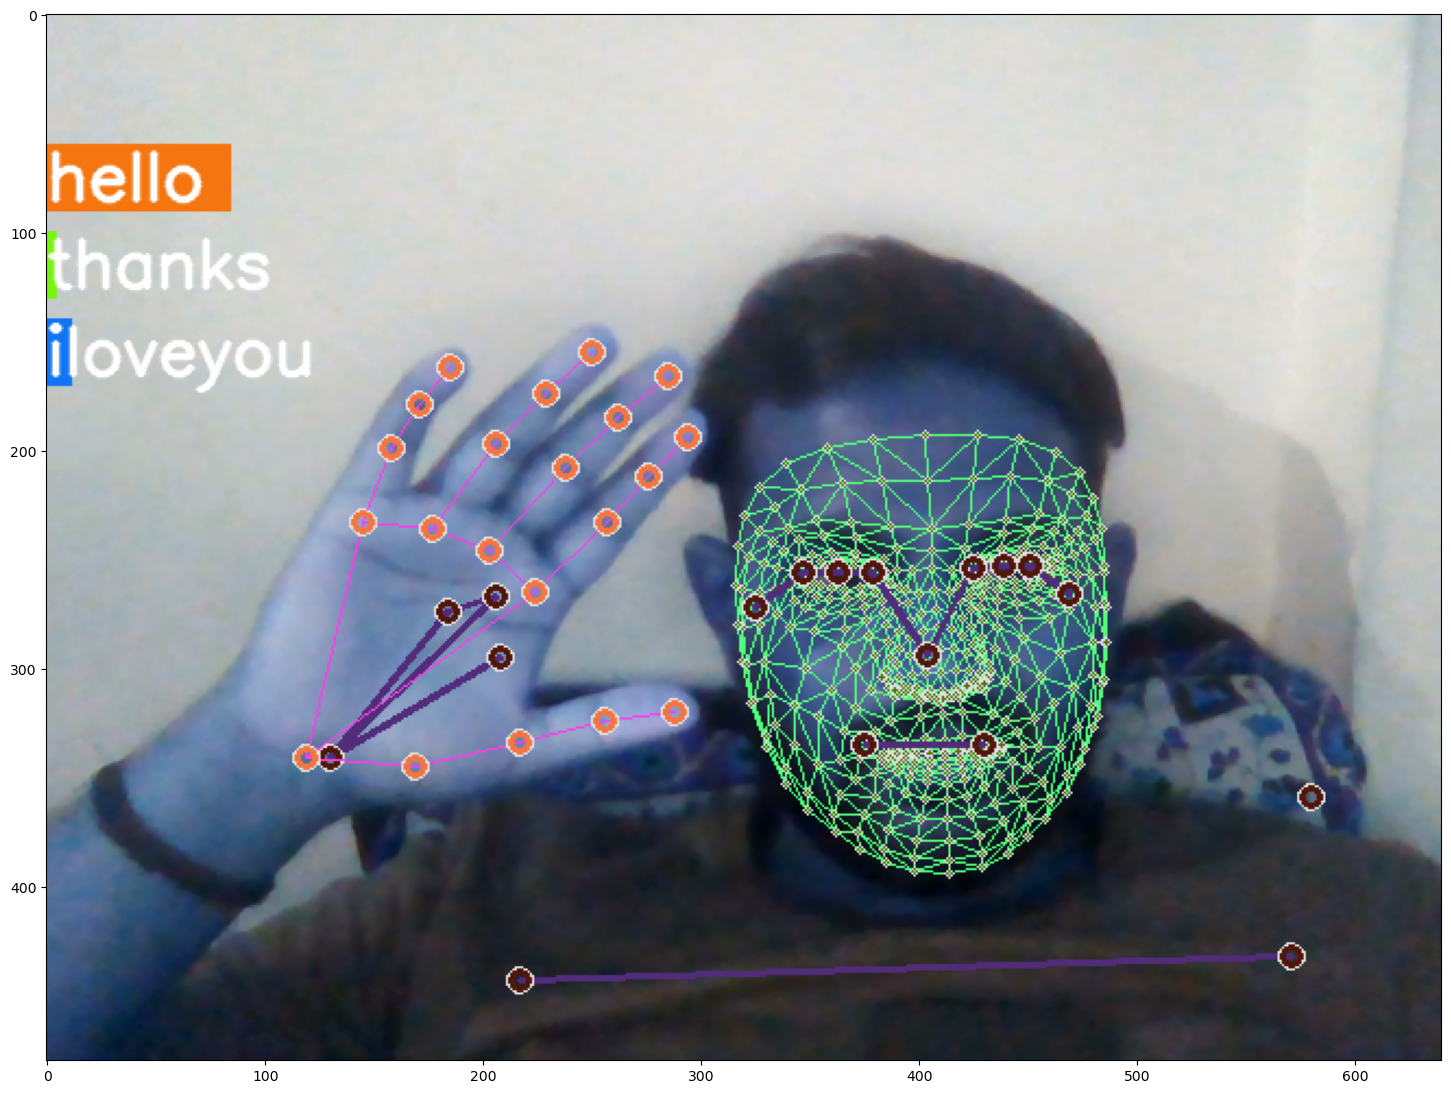

In [109]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res,actions,image,colors))

In [115]:
#new detection variable -:
sequence=[]
sentence=[]
predictions=[]
threshold=0.4

#We make sure that we can access the webcam -:
cap= cv2.VideoCapture(0)  #accessing webcam
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():    #looping through frames  
        
        #Read feed
        ret,frame = cap.read()
    
        #make  detection
        image,results = mediapipe_detection(frame,holistic)
        
        #Draw Landmarks
        draw_styled_landmarks(image,results)
        
        #2.prediction logic
        keypoints=extract_keypoints(results)
        sequence.append(keypoints)
        sequence=sequence[-30:]
        
        if len(sequence)==30:
            res= model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            #3. visualisation logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)]>threshold:
                    if len(sentence)>0:
                        if actions[np.argmax(res)]!=sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else :
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) >5: 
                    sentence=sentence[-5:]
                   
            #visualisation probabilities 
            image=prob_viz(res,actions,image,colors)
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)

        #Show to screen
        cv2.imshow('OpenCV Feed', image)
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 44ms/step
hello
1/1 [==============================] - 0s 43ms/step
hello
1/1 [==============================] - 0s 45ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 34ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 48ms/step
hello
1/1 [==============================] - 0s 35ms/step
hello
1/1 [==============================] - 0s 50ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 47ms/step
hello
1/1 [=========

1/1 [==============================] - 0s 47ms/step
hello
1/1 [==============================] - 0s 37ms/step
thanks
1/1 [==============================] - 0s 43ms/step
thanks
1/1 [==============================] - 0s 59ms/step
hello
1/1 [==============================] - 0s 37ms/step
thanks
1/1 [==============================] - 0s 48ms/step
hello


In [112]:
model.predict(X_test)

2/2 [==============================] - 0s 58ms/step


array([[2.8243772e-07, 1.7168216e-07, 9.9999952e-01],
       [4.1078812e-07, 9.9999952e-01, 1.7345660e-07],
       [2.4701039e-08, 9.9999988e-01, 7.9906606e-08],
       [3.6885240e-08, 5.2218053e-05, 9.9994779e-01],
       [9.9922287e-01, 7.6561534e-08, 7.7704829e-04],
       [9.7140151e-07, 9.9999070e-01, 8.3804553e-06],
       [1.0000000e+00, 4.4264858e-15, 5.0787727e-13],
       [3.4357353e-09, 2.1134570e-06, 9.9999785e-01],
       [1.4671066e-06, 3.1377544e-07, 9.9999821e-01],
       [4.4342041e-08, 9.9999905e-01, 8.9608716e-07],
       [1.0000000e+00, 1.1114100e-14, 1.1806588e-08],
       [1.5985750e-06, 9.9999845e-01, 9.8960040e-09],
       [1.0000000e+00, 3.5306542e-13, 4.9854881e-11],
       [1.0000000e+00, 7.8416116e-15, 3.4775698e-12],
       [1.0000000e+00, 3.7433753e-16, 9.5740028e-13],
       [6.7259485e-08, 1.3586207e-07, 9.9999976e-01],
       [2.8384211e-06, 9.9999702e-01, 1.4969036e-07],
       [2.3153371e-08, 2.1336466e-07, 9.9999976e-01],
       [1.1647880e-05, 9.954

In [114]:
cap.release()
cv2.destroyAllWindows()